In [3]:
from google.colab import files
file = files.upload()

Saving BankCustomers.csv to BankCustomers.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense

In [34]:
df = pd.read_csv('BankCustomers.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [36]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [37]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [0]:
df.drop(['RowNumber', 'CustomerId', 'Surname'],1 , inplace = True)

In [0]:
Gender = {'Female':0, 'Male':1}

df.Gender = [Gender[i] for i in df.Gender]

In [51]:
#  convert text to integer

def convert_to_int(data):
  columns = df.columns.values
  
  for col in columns: 
    text_to_list = {}
    
    def to_list(i):
      return text_to_list[i]
    
    if df[col].dtype!=np.int64 and df[col].dtype!=np.float64:
      column_content = df[col].values.tolist()
      column_content = set(column_content)
      
      X=0
      for unique in column_content:
        if unique not in text_to_list:
          text_to_list[unique] = X
          X+=1
      df[col] = list(map(to_list, df[col]))
  return df.head(10)
      
    
 
convert_to_int(df)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,645,2,1,44,8,113755.78,2,1,0,149756.71,1
6,822,0,1,50,7,0.00,2,1,1,10062.80,0
7,376,1,0,29,4,115046.74,4,1,0,119346.88,1
8,501,0,1,44,4,142051.07,2,0,1,74940.50,0
9,684,0,1,27,2,134603.88,1,1,1,71725.73,0


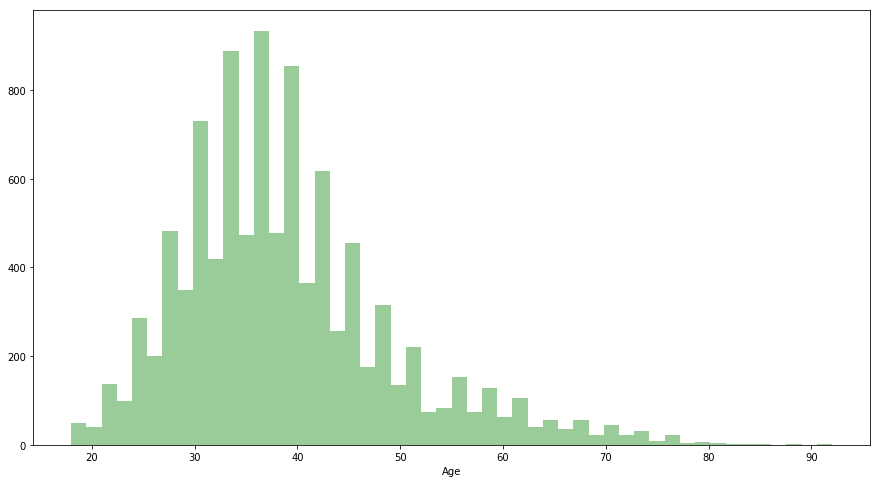

In [67]:
plt.figure(figsize =[15,8])
sns.distplot(df['Age'],kde=False,rug=False, color = 'green', label='Age',)

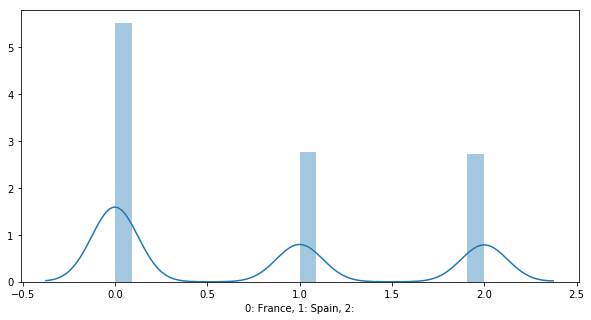

In [79]:
plt.figure(figsize=(10,5))
sns.distplot(df['Geography'], axlabel='0: France, 1: Spain, 2:')

In [90]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [0]:
X = df.iloc[:, :9]
y = df.iloc[:,10]


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [0]:
clf = Sequential()

In [138]:
clf.add(Dense(activation='relu', input_dim = 9, units=6, kernel_initializer='uniform'))

clf.add(Dense(activation = 'relu', units = 6,kernel_initializer='uniform'))

clf.add(Dense(activation = 'relu', units = 6,kernel_initializer='uniform'))

clf.add(Dense(activation = 'sigmoid', units = 1, kernel_initializer="uniform"))

clf.compile(optimizer='adam', loss='binary_crossentropy', metrics =['accuracy'])

clf.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
8000/8000 [==============================] - 2s 201us/step - loss: 0.5228 - acc: 0.7926
Epoch 2/100
8000/8000 [==============================] - 1s 142us/step - loss: 0.5112 - acc: 0.7929
Epoch 3/100
8000/8000 [==============================] - 1s 145us/step - loss: 0.5097 - acc: 0.7929
Epoch 4/100
8000/8000 [==============================] - 1s 138us/step - loss: 0.5084 - acc: 0.7929
Epoch 5/100
8000/8000 [==============================] - 1s 146us/step - loss: 0.5060 - acc: 0.7929
Epoch 6/100
8000/8000 [==============================] - 1s 145us/step - loss: 0.5044 - acc: 0.7929
Epoch 7/100
8000/8000 [==============================] - 1s 125us/step - loss: 0.5020 - acc: 0.7929
Epoch 8/100
8000/8000 [==============================] - 1s 130us/step - loss: 0.5001 - acc: 0.7929
Epoch 9/100
8000/8000 [==============================] - 1s 124us/step - loss: 0.4971 - acc: 0.7929
Epoch 10/100
8000/8000 [==============================] - 1s 123us/step - loss: 0.4936 - acc: 0.7929

In [155]:
score = clf.predict(X_test)
score = score>0.5
score

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [156]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, score.round())
a_s = accuracy_score(y_test, score.round())
cm,a_s

(array([[1600,   20],
        [ 350,   30]]), 0.815)